# Taller 1

<center>

|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |

</center>

---

## El problema de Monty Hall

En un programa concurso Ud puede ganar un carro. Para hacerlo debe seleccionar una de tres puertas.Detras de una de ellas esta el carro y si la selecciona se gana el carro.

Tras su seleccion una de las puertas, el animador del programa abrirá otra de las puertas, detrás de la que hay una cabra. Recuerde que el animador sabe que hay detras de cada puerta.

Tras abrir la otra puerta, el animador le da la posibilidad de cambiar de puerta, ¿Ud se cambia o no de puerta?

---

### 1
Para decidir si debe cambiar o no de puerta Ud ha decidido modelar este problema 
como una Red Bayesiana.

### 2
Defina tres variables aleatorias U, C y A, que representan la puerta seleccionada por Ud, la puerta detras de la cual esta el carro, y la puerta que selecciona el animador, respectivamente. Las tres variables tienen espacio de estados {1, 2, 3}.

### 3

Ud ha definido la siguiente red bayesiana para modelar este problema. En sureporte explique por que decide emplear esta red.

<center>
<img src="https://i.postimg.cc/Rhv56YK4/Punto1.png" width="400" height="350" />
<img src="https://i.postimg.cc/d3zq76sB/Punto2y3.png" width="400" height="350" />
</center>

**Respuesta**

La puerta que se eligió y la puerta en la que se encuentra el carro son procesos aleatorios entre las tres puertas. Mientras que la puerta que abre el anfitrión esta **condicionada** de la puerta que eligi inicialmente; no puede ser la misma puerta que eligi, y a su vez de la puerta en la que esta ubicada el carro; el anfitrion tiene que abrir una puerta donde detras hay una cabra. Es por esto que se representa la red bayesiana por medio de 2 nodos padres, y un nodo decendiente.

---

### 4
Responda las siguientes preguntas en su reporte:

1. ¿Tiene esta red estructuras en V? Si las tiene, ¿Que implicaciones tienen en la influencia entre las variables de la red?

    **R/**
    
    Esta red **si tiene estructuras en V**. Esta estrucutra esta compuesta por 2 nodos causas; nodos padres, y su efecto comun; nodo descendiente. Aunque los nodos padres en un principio eran marginalmente independientes se vuelven condicionalmente dependientes dada la evidencia de sus hijos. 

1. ¿Que tipo de analisis considera es mas relevante en este caso? ¿Causal, evidencial, intercausal? ¿Por que?

    **R/**
    
    
    En este caso queremos saber si cambio la puerta que seleccione al inicio o no; es decir, queremos saber cual es la puerta que tiene mas probabilidades de que el carro se encuentre detras. Para poder realizar este analisis es necesario contar con un nodo causa y su efecto; la puerta que he seleccionado y la puerta que el anfitrion ha descubierto con la cabra, teniendo estos valores se logra identificar las probabilidades de que el premio se encuentre en cada una de las puertas restantes. Por tal motivo se esta tratando de un **razonamiento intercausal**.

1. ¿Que independencias condicionales captura esta red?

    **R/**
    
    Esta red **no** presenta independecias condicionales, solo independencias marginales.

---

5. El carro ha sido ubicado al azar detras de alguna de las puertas, y Ud selecciona una puerta al azar inicialmente. Modele este comportamiento con las distribuciones de probabilidad P(U) y P(C). 

    a. **La puerta que elegi**: 
    Las tres puertas tienen la misma probabilidad de ser elegidas

    <center>

    | P(U) | U | 
    | :-: | :-: | 
    | 1 | 1/3 |
    | 2 | 1/3 |
    | 3 | 1/3 |

    </center>

    b. **La puerta en la que se encuentra detras el carro**:
    El premio puede estar ubicado en cualquiera de las tres puertas

    <center>

    | P(C) | C | 
    | :-: | :-: | 
    | 1 | 1/3 |
    | 2 | 1/3 |
    | 3 | 1/3 |

    </center>

6. EL comportamiento del Animador (la puerta que decide mostrar) depende tanto de su seleccion como de la puerta donde se encuentra el carro. Modele el comportamiento del Animador con la distribucion condicional de probabilidad P(A|C,U) (note que esta representacion es estocastica por columnas)

    <center>

    | P(A/C,U) | C | Puerta 1 | Puerta 1 | Puerta 1 | Puerta 2 | Puerta 2 | Puerta 2 | Puerta 3 | Puerta 3 | Puerta 3 |
    | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
    | A | U | Puerta 1 | Puerta 2 | Puerta 3 | Puerta 1 | Puerta 2 | Puerta 3 | Puerta 1 | Puerta 2 | Puerta 3 |
    | 1 | | 0 | 0 | 0 | 0 | 0.5 | 1 | 0 | 1 | 0.5 |
    | 2 | | 0.5 | 0 | 1 | 0 | 0 | 0 | 1 | 0 | 0.5 |
    | 3 | | 0.5 | 1 | 0 | 1 | 0.5 | 0 | 0 | 0 | 0 |

    </center>

In [43]:
import pgmpy

#En su editor de python cree un nuevo archivo monty.py e 
#incluya los objetos BayesianNetwork y TabularCPD

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

#Defina ahora la estructura de la red incluyendo los arcos y nodos

model = BayesianNetwork([("C","A"),("U","A")])

#Defina las CPDs de C y U

cpd_c = TabularCPD(variable="C", variable_card=3, values=[[0.33], [0.33], [0.33]])
cpd_u = TabularCPD(variable="U", variable_card=3, values=[[0.33], [0.33], [0.33]])

#Defina la CPD de A

cpd_a = TabularCPD(
    variable="A",
    variable_card=3,
    values=[
        [0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
        [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
        [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0],
    ],
    evidence=["C", "U"],
    evidence_card=[3, 3],
)

11. En la documentacion de pgmpy podra encontrar los detalles de la clase TabularCPD, ver https://pgmpy.org/factors/discrete.html. En su reporte justifique el valor de los argumentos usados al crear los tres objetos de la clase TabularCPD.

    **Explicación variable cpd_c y cpd_u:**

    1. El primer parametro hace referenfia al nombre del objeto cuya distribución de probabilidad condicional vamos a definir; "C" y "U".

    2. El segundo parametro hace referencia al numero de espacio de estados de la variable; en ambos casos se tienen 3 variables de estado: {Puerta 1, Puerta 2, Puerta 3}. 
    
    3. El tercer parametro hace referencia a los valores de la tabla de probabilidad condicional del objeto que vamos a definir; en este caso ambos objetos tienen la misma probabilidad de elegir cualquier puerta [0.33, 0.33, 0.33]

    **Explicación variable cpd_a:**

    1. El primer parametro hace referenfia al nombre del objeto cuya distribución de probabilidad condicional vamos a definir; "A".

    2. El segundo parametro hace referencia al numero de espacio de estados de la variable; al igual que en los dos casos anteriores se tienen 3 variables de estado: {Puerta 1, Puerta 2, Puerta 3}. 
    
    3. El tercer parametro hace referencia a los valores de la tabla de probabilidad condicional del objeto que vamos a definir; en este caso se hace referencia a una lista.

    4. El cuarto paremetro hace referencia a las variables CPD que ya han sido definidas y son causales del objeto que vamos a definir.

    5. El quinto parametro hace referencia al numero de espacio de estados que tienen las variables causales del objeto que vamos a definir.

In [44]:
#Asocie las 3 CPDs a su modelo

model.add_cpds(cpd_c, cpd_u, cpd_a)

#Revise que su modelo est ́e completo

model.check_model()

#Importe la clase VariableElimination del paquete de inferencia y cree un objeto de
#esta clase

from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

# Suponga que Ud selecciona la puerta 1 y el animador la puerta 3. ¿Cual es la probabilidad 
# de que el carro este detras de cada una de las puertas?

posterior_p =infer.query(["C"], evidence = {"U": 0, "A": 2})
print(posterior_p)

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.3333 |
+------+----------+
| C(1) |   0.6667 |
+------+----------+
| C(2) |   0.0000 |
+------+----------+


16. Explique el anterior comando a partir de la documentacion del la librerıa https:// pgmpy.org/exact_infer/ve.html#pgmpy.inference.ExactInference.VariableElimination. query.

    **query(["C"], evidence = {"U": 0, "A": 2})**

    1. La primera variable : "C", hace referencia a la variable a la cual queremos calcular la probabilidad

    2. La segunda variable; {"U": 0, "A": 2}, hace referencia a un diccionario con pares de valores que contiene las variables y su respectivo espacio de estados que se quiere usar como evidecia para calcular la probabilidad. 

17. Interprete los resultados. ¿Es mejor cambiarse de puerta o no?

    Por medio de los resultados podemos asegurar que **es mejor cambiarse de puerta**, ya que de esta manera la probabilidad que tengo de ganar el carro aumenta de 33,33% a 66,67%.

18. Modifique la evidencia para considerar otros casos de seleccion de puertas, tanto la que Ud selecciona como la que el Animador abre. ¿Como interpreta estos resultados?

In [45]:
for i in range(0,3):
    for j in range(0,3):
        if i != j:
            prob = infer.query(["C"],evidence={"U": i,"A": j})
            print("A = "+str(j)+" "+"U = "+str(i))
            print(prob)

A = 1 U = 0
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.3333 |
+------+----------+
| C(1) |   0.0000 |
+------+----------+
| C(2) |   0.6667 |
+------+----------+
A = 2 U = 0
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.3333 |
+------+----------+
| C(1) |   0.6667 |
+------+----------+
| C(2) |   0.0000 |
+------+----------+
A = 0 U = 1
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0000 |
+------+----------+
| C(1) |   0.3333 |
+------+----------+
| C(2) |   0.6667 |
+------+----------+
A = 2 U = 1
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6667 |
+------+----------+
| C(1) |   0.3333 |
+------+----------+
| C(2) |   0.0000 |
+------+----------+
A = 0 U = 2
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0000 |
+------+----------+
| C(1) |   0.6667 |
+------+----------+
| C(2) |   0.3333 |
+------+----------+
A = 1 U = 2
+------+----------+
| C    |

Podemos observar que en todos los casos que:

1. **SIEMPRE** va a ser preferible cambiar la puerta que inicialmente escogi; dado que esta tiene una mayor probabilidad de que atras se encuentre el carro dado que la su probabilidad cambia de 33.33% a 66.67%. 

2. La probabilidad de que el premio se encuentre en la puerta que el animador ("A") selecciono **SIEMPRE** es 0.

19. Compare ahora con el caso en que solo tiene como evidencia la puerta que Ud selecciono.

In [46]:
for i in range(0,3):
    prob_2 = infer.query(["C"],evidence={"U": i})
    print("U = "+str(i))
    print(prob_2)

U = 0
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.3333 |
+------+----------+
| C(1) |   0.3333 |
+------+----------+
| C(2) |   0.3333 |
+------+----------+
U = 1
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.3333 |
+------+----------+
| C(1) |   0.3333 |
+------+----------+
| C(2) |   0.3333 |
+------+----------+
U = 2
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.3333 |
+------+----------+
| C(1) |   0.3333 |
+------+----------+
| C(2) |   0.3333 |
+------+----------+


Tener la información de la puerta que yo escogi no es evidencia suficiente para concluir o determinar si detras de una puerta se encuentra una cabra o un coche, por tal motivo todas las puertas tienen la misma probabilidad de que el premio se encuentre detras de esta.

20. Compare ahora con el caso en que solo tiene como evidencia la puerta que abre el Animador

In [47]:
for i in range(0,3):
    prob_3 = infer.query(["C"],evidence={"A": i})
    print("A = "+str(i))
    print(prob_3)

A = 0
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+
| C(2) |   0.5000 |
+------+----------+
A = 1
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.0000 |
+------+----------+
| C(2) |   0.5000 |
+------+----------+
A = 2
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+
| C(2) |   0.0000 |
+------+----------+


En el caso en el que solo se conozca la puerta que selecciono el animador nos quedan 2 posibles opciones, una puerta que detras tienen una cabra o una puerta que detras tiene el carro. Como no se tiene la informacion de la puerta que he seleccionado, simplemente se puede decir que se reducen las opciones de puertas que puedo escoger a 2 y ambas tienen la misma posibilidad de que al abrirla se encuentre el carro; 50%.

21. Concluya.

Luego de modelar el problema de Monty Hall por medio de una Red Bayesiana se logro concluir que teniendo la informacion de la puerta que seleccione inicialmente y la puerta que abre el anfitrion, **es preferible cambiar de puerta** ya que la otra puerta tendra el doble de probabilidad de que el carro se encuentre detras.

# El problema de la alarma antirrobo

Ud ha instalado una alarma antirrobo. La alarma es buena detectando intrusos pero tambien se activa con movimientos sısmicos. Ud tiene ademas buena relacion con dos vecinos, Juan y Marıa, quienes lo llaman en caso de que escuchen la alarma. Juan suele llamar al escuchar la alarma, pero tambien se confunde con otros ruidos y llama cuando la alarma no ha sonado. Marıa a veces no escucha la alarma. Su evidencia consiste en si Juan y/o Marıa lo llaman, y basado en esto Ud quiere estimar la probabilidad de que haya habido un robo.

1. Para estimar la probabilidad de robo Ud ha decidido modelar este problema como una Red Bayesiana.

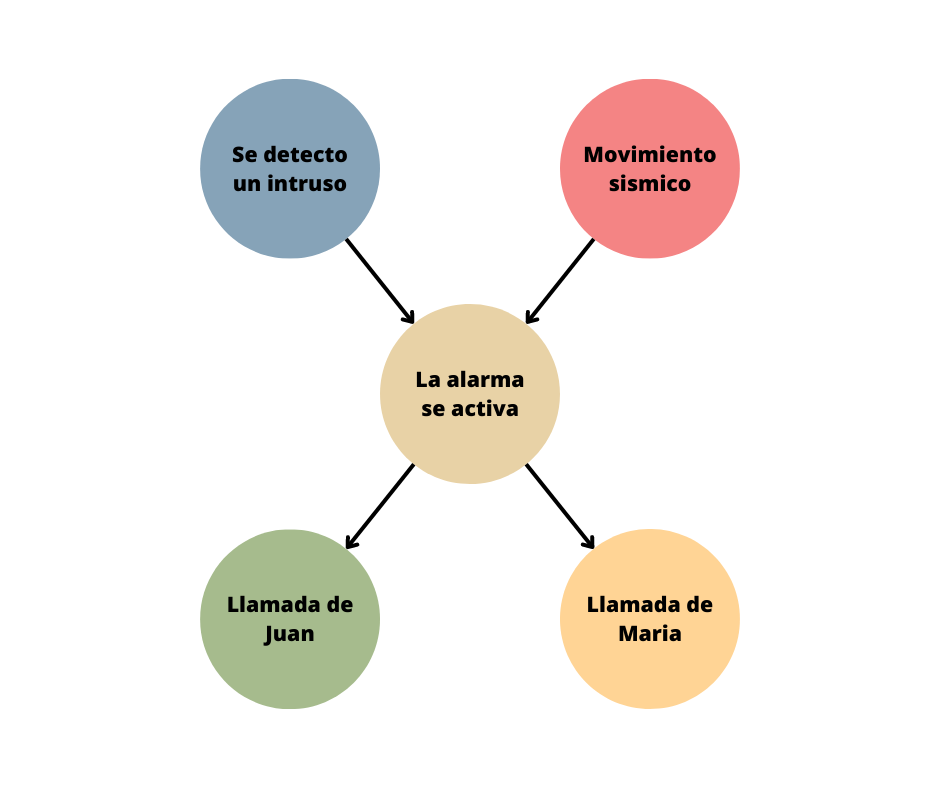

In [48]:
Image("Punto3.png")

2. Defina cinco variables aleatorias R, S, A, J y M que representan el robo, el sismo, la alarma, la llamada de Juan y la de Mar ́ıa, respectivamente. Todas las variables tienen espacio de estados {V, F } (verdadero y falso).

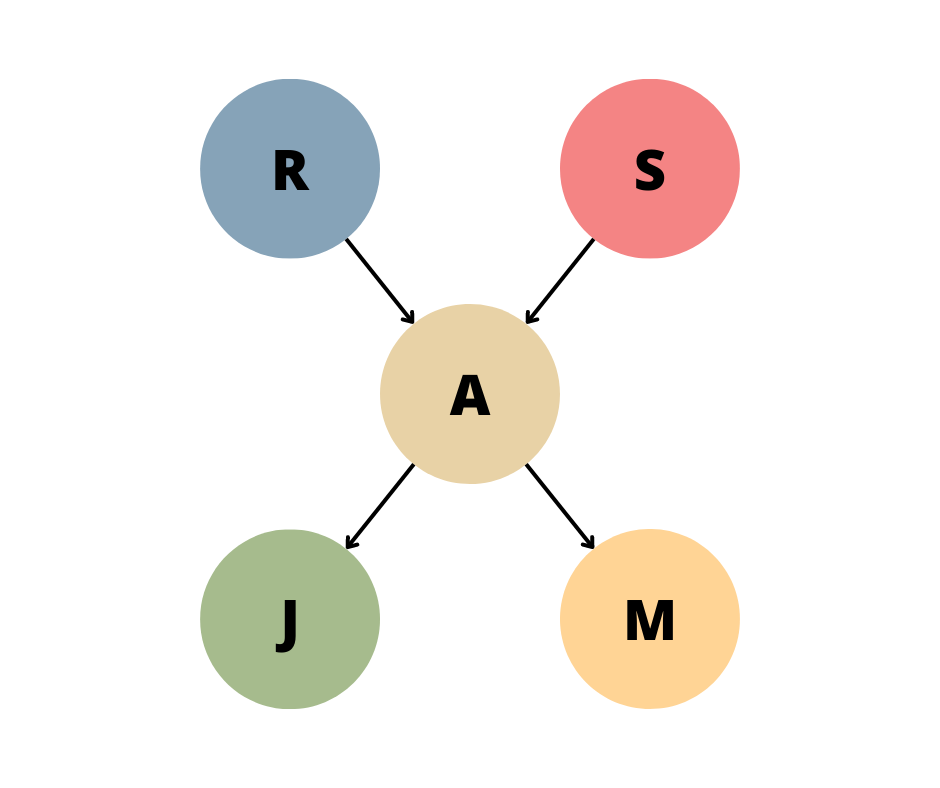

In [49]:
Image("Punto4y5.png")

3. Ud ha definido la siguiente red bayesiana para modelar este problema.En su reporte explique por que decide emplear esta red.

    La ocurrencia que de un intruso entre a la casa o de que se presente un sismo son procesos aleatorios, pero estos son la causa de que se active la alarma. Por otro lado, que llame Juan o Maria se debe a si escuchan que la alarma se activa o no.

4. Responda las siguientes preguntas en su reporte:

    a) ¿Tiene esta red estructuras en V? Si las tiene, ¿Que implicaciones tienen en la influencia entre las variables de la red?

    Esta red **si tiene estructuras en V**. Esta estrucutra esta compuesta por 2 nodos causas; nodos padres, y su efecto comun; nodo descendiente. Robo y Sismo son los nodos exploicativos para que la alarma se active o no.

    b) ¿Que tipo de analisis considera es mas relevante en este caso? ¿Causal, evidencial, intercausal? ¿Por que?
    
    En este caso queremos saber cual es la probabilidad de que Juan o Maria me llamen dado que se produjo un robo; a partir de los resultados se quiere llegar a las causas. Por tal motivo se esta tratando de un **razonamiento evidencial, explicativo o diagnostico**.

    c) ¿Que independencias condicionales captura esta red?

    Esta red **si** presenta independencias condicionales, se puede observar en el caso de que Juan o Maria llamen dado que sono la alarma. Tener información de que Juan llama no nos da mas información sobre si Maria llama, y viceversa. Este tipo de independencias nos permite factorizar la distribución conjunta.

5. La probabilidad de un robo se ha estimado en 0.01, mientras la de un sismo en 0.02. Modele este comportamiento con las distribuciones de probabilidad P(R) y P(S).

    a. **Robo**: 

    <center>

    | P(R) | R |
    | :-: | :-: | 
    | V | 0.99 | 
    | F | 0.01 | 

    </center>

    b. **Sismo**: 

    <center>

    | P(S) | S |
    | :-: | :-: | 
    | V | 0.98 | 
    | F | 0.02 | 

    </center>

6. La alarma responde a un robo o a un sismo de acuerdo con la siguiente CPD:

    <center>

    |  | R | V | V | F | F |
    | :-: | :-: | :-: | :-: | :-: | :-: |
    | A | S | V | F | V | F |
    | V | | 0.95 | 0.94 | 0.29 | 0.001 | 
    | F | | 0.05 | 0.06 | 0.71 | 0.999 | 

    </center>

    Interprete estas probabilidades en su reporte.

    A partir de estas probabilidades se puede concluir que:

    

7. Si suena la alarma, Juan llama 9 de cada 10 veces, mientras Marıa llama 7 de cada 10 veces. Si la alarma NO suena, Juan llama 1 de cada 20 veces, mientras Mar ́ıa llama 1 de cada 100 veces. Modele este comportamiento con las distribuciones de probabilidad P(J|A) y P(M|A).

    a. **Juan**:

    <center>

    | P(J/A) | A | A |
    | :-: | :-: | :-: |
    | J | V | F |
    | V | 0.9 | 0.05 |
    | F | 0.1 | 0.95 |

    </center>

    a. **Maria**:

    <center>

    | P(M/A) | A | A |
    | :-: | :-: | :-: |
    | M | V | F |    
    | V | 0.7 | 0.01 |  
    | F | 0.3 | 0.99 |  

    </center>


In [50]:
import pgmpy

#En su editor de python cree un nuevo archivo alarma.py e implemente el modelo creado 
# para el problema de la alarma antirrobo. Utilice las clases BayesianNetwork, TabularCPD 
# y VariableElimination de pgmpy.

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

#Defina ahora la estructura de la red incluyendo los arcos y nodos

model_2 = BayesianNetwork([("R","Al"),("S","Al"),("Al","J"),("Al","M")])

#Defina las CPDs de R y S

cpd_r = TabularCPD(variable="R", variable_card=2, values=[[0.01], [0.99]])
cpd_s = TabularCPD(variable="S", variable_card=2, values=[[0.02], [0.98]])

#Defina la CPD de A

cpd_al = TabularCPD(
    variable="Al",
    variable_card=2,
    values=[
        [0.95, 0.94, 0.29, 0.001],
        [0.05, 0.06, 0.71, 0.999],
    ],
    evidence=["R", "S"],
    evidence_card=[2, 2],
)

#Defina la CPD de J

cpd_j = TabularCPD(
    variable="J",
    variable_card=2,
    values=[
        [0.9, 0.05],
        [0.1, 0.95],
    ],
    evidence=["Al"],
    evidence_card=[2],
)

#Defina la CPD de M

cpd_m = TabularCPD(
    variable="M",
    variable_card=2,
    values=[
        [0.7, 0.01],
        [0.3, 0.99],
    ],
    evidence=["Al"],
    evidence_card=[2],
)

#Asocie las 5 CPDs a su modelo

model_2.add_cpds(cpd_r, cpd_s, cpd_al, cpd_j, cpd_m)

#Revise que su modelo est ́e completo

model_2.check_model()

print(model_2.get_independencies())


(R ⟂ S)
(R ⟂ M, J | Al)
(R ⟂ M, J | Al, S)
(R ⟂ J | Al, M)
(R ⟂ M | Al, J)
(R ⟂ J | Al, M, S)
(R ⟂ M | Al, S, J)
(M ⟂ R, S, J | Al)
(M ⟂ S, J | Al, R)
(M ⟂ R, J | Al, S)
(M ⟂ R, S | Al, J)
(M ⟂ J | Al, R, S)
(M ⟂ S | Al, R, J)
(M ⟂ R | Al, S, J)
(S ⟂ R)
(S ⟂ M, J | Al)
(S ⟂ M, J | Al, R)
(S ⟂ J | Al, M)
(S ⟂ M | Al, J)
(S ⟂ J | Al, R, M)
(S ⟂ M | Al, R, J)
(J ⟂ R, S, M | Al)
(J ⟂ S, M | Al, R)
(J ⟂ R, M | Al, S)
(J ⟂ R, S | Al, M)
(J ⟂ M | Al, R, S)
(J ⟂ S | Al, R, M)
(J ⟂ R | Al, M, S)


10. Considere 4 casos de evidencia: recibe llamadas tanto de Juan como de Mar ́ıa, recibe la llamada de uno solo de ellos, o ninguno lo llama. Calcule la probabilidad de que haya ocurrido un robo en cada caso. Incluya sus resultados y ana ́lisis en su reporte.


In [51]:

#Importe la clase VariableElimination del paquete de inferencia y cree un objeto de
#esta clase

from pgmpy.inference import VariableElimination

infer_2 = VariableElimination(model_2)

for i in range(0,2):
    for j in range(0,2):
        prob_4 = infer_2.query(["R"],evidence={"J": i, "M": j})
        print("J = "+str(j)+" "+"M = "+str(i))
        print(prob_4)


J = 0 M = 0
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.5565 |
+------+----------+
| R(1) |   0.4435 |
+------+----------+
J = 1 M = 0
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.0484 |
+------+----------+
| R(1) |   0.9516 |
+------+----------+
J = 0 M = 1
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.0634 |
+------+----------+
| R(1) |   0.9366 |
+------+----------+
J = 1 M = 1
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.0009 |
+------+----------+
| R(1) |   0.9991 |
+------+----------+


A partir de estos analisis se puede concluir que:

1. La probabilidad de que 

11. Suponga ahora que, cuando NO se activa la alarma, Juan lo llama con la misma probabilidad de Marıa, es decir, 1 de cada 100 veces. Recalcule sus probabilidades y analice los cambios en su reporte.

In [56]:
#Defina ahora la estructura de la red incluyendo los arcos y nodos

model_3 = BayesianNetwork([("R","Al"),("S","Al"),("Al","Ju"),("Al","M")])

#Se redefine la CPD de J

cpd_j2 = TabularCPD(
    variable="Ju",
    variable_card=2,
    values=[
        [0.9, 0.01],
        [0.1, 0.99],
    ],
    evidence=["Al"],
    evidence_card=[2],
)

#Asocie las 5 CPDs a su modelo

model_3.add_cpds(cpd_r, cpd_s, cpd_al, cpd_j2, cpd_m)

#Revise que su modelo est ́e completo

model_3.check_model()

#Importe la clase VariableElimination del paquete de inferencia y cree un objeto de
#esta clase

from pgmpy.inference import VariableElimination

infer_3 = VariableElimination(model_3)

for i in range(0,2):
    for j in range(0,2):
        prob_5 = infer_3.query(["R"],evidence={"Ju": i, "M": j})
        print("J = "+str(j)+" "+"M = "+str(i))
        print(prob_5)


J = 0 M = 0
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.5779 |
+------+----------+
| R(1) |   0.4221 |
+------+----------+
J = 1 M = 0
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.1806 |
+------+----------+
| R(1) |   0.8194 |
+------+----------+
J = 0 M = 1
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.0611 |
+------+----------+
| R(1) |   0.9389 |
+------+----------+
J = 1 M = 1
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.0009 |
+------+----------+
| R(1) |   0.9991 |
+------+----------+
